# Michell Luiz Costalonga
# Exercício 1

Criar uma tabela dados_cadastrais onde cada linha representa um funcionário e com os seguintes atributos: id, nome, sobrenome, data_nasci, cpf e endereco; Criar uma tabela dados_profissionais com id, graduacao, cargo, salario e tempo_casa. Insira 4 registros em cada uma das tabelas.

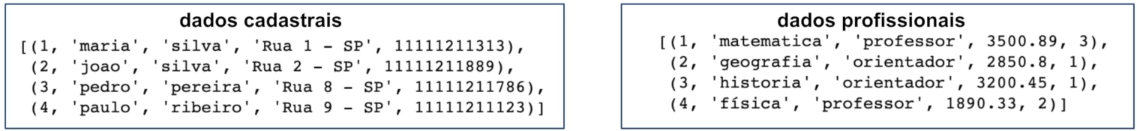

In [1]:
# Importando a biblioteca.

import sqlite3 as sql

In [2]:
# Criando um banco de dados e estabelecendo uma conexão

conn = sql.connect('dados.db')


In [3]:
# Determinando variável para criar as tabelas.

cursor = conn.cursor()

In [4]:
# Criando a tabela dados cadastrais e dados profissionais
cursor.execute("CREATE TABLE dados_cadastrais (id integer, nome text, sobrenome text, data_nasci text, cpf integer, endereco text)")
cursor.execute("CREATE TABLE dados_profissionais (id integer, graduacao text, cargo text, salario real, tempo_casa integer)")

In [5]:
# Inserindo os dados nas tabelas
cursor.execute("INSERT INTO dados_cadastrais VALUES(1, 'Maria', 'Silva', '12/11/1989', 12312312303, 'Rua A')")
cursor.execute("INSERT INTO dados_cadastrais VALUES(2, 'João', 'Silva', '10/01/1978', 12312312302, 'Rua B')") 
cursor.execute("INSERT INTO dados_cadastrais VALUES(3, 'Pedro', 'Pereira', '18/12/1977', 12312312301, 'Rua B')") 
cursor.execute("INSERT INTO dados_cadastrais VALUES(4, 'Paula', 'Ribeiro', '04/06/1993', 12312312304, 'Rua C')")
cursor.execute("INSERT INTO dados_profissionais VALUES(1, 'Matemática', 'Professora', 3500.89, 3)")
cursor.execute("INSERT INTO dados_profissionais VALUES(2, 'Geografia', 'Orientador', 2850.80, 1)")
cursor.execute("INSERT INTO dados_profissionais VALUES(3, 'História', 'Orientador', 3200.45, 1)")
cursor.execute("INSERT INTO dados_profissionais VALUES(4, 'Física', 'Professora', 1890.33, 2)")
conn.commit()

In [6]:
# Imprimindo as informações da tabela "dados_cadastrais"
cursor.execute("SELECT * FROM dados_cadastrais") 
cursor.fetchall()

[(1, 'Maria', 'Silva', '12/11/1989', 12312312303, 'Rua A'),
 (2, 'João', 'Silva', '10/01/1978', 12312312302, 'Rua B'),
 (3, 'Pedro', 'Pereira', '18/12/1977', 12312312301, 'Rua B'),
 (4, 'Paula', 'Ribeiro', '04/06/1993', 12312312304, 'Rua C')]

In [7]:
# Imprimindo as informações da tabela "dados_profissionais"
cursor.execute("SELECT * FROM dados_profissionais") 
cursor.fetchall()

[(1, 'Matemática', 'Professora', 3500.89, 3),
 (2, 'Geografia', 'Orientador', 2850.8, 1),
 (3, 'História', 'Orientador', 3200.45, 1),
 (4, 'Física', 'Professora', 1890.33, 2)]

# Exercício 2

Usando a tabela dados profissionais, escreva uam query que retorne todos os campos da tabela ordenando-os pela coluna tempo de casa, de maneira decrescente.

In [8]:
cursor.execute("SELECT * FROM dados_profissionais ORDER BY tempo_casa DESC")
cursor.fetchall()

[(1, 'Matemática', 'Professora', 3500.89, 3),
 (4, 'Física', 'Professora', 1890.33, 2),
 (2, 'Geografia', 'Orientador', 2850.8, 1),
 (3, 'História', 'Orientador', 3200.45, 1)]

# Exercício 3

Conte a quantidade de funcionários dessa empresa.

In [10]:
cursor.execute("SELECT COUNT(DISTINCT id) FROM dados_cadastrais")
cursor.fetchall()

[(4,)]

# Exercício 4

Usando a tabela dados cadastrais, escreva uma query que liste apenas os funcionários que possuem sobrenome "Silva", ordenados pelo nome completo, ou seja, nome e sobrenome.

In [16]:
cursor.execute("SELECT nome, sobrenome FROM dados_cadastrais WHERE sobrenome = 'Silva' ORDER BY nome ASC")
cursor.fetchall()

[('João', 'Silva'), ('Maria', 'Silva')]

# Exercício 5

Escreva uma query que liste o valor da folha de pagamento dessa empresa por cargo, usando a tabela dados_profissionais. (Ou seja, somar os salários em cada cargo)

In [19]:
cursor.execute("SELECT cargo, SUM(salario) FROM dados_profissionais GROUP BY cargo")
cursor.fetchall()

[('Orientador', 6051.25), ('Professora', 5391.219999999999)]